In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df = pd.read_csv("/content/drive/MyDrive/datasets/MyCall_Data_September_2019_cleaning.csv")
df.head(100)

,Operator,In Out Travelling,Network Type,Rating,Call Drop Category,Latitude,Longitude,State Name
0,RJio,Indoor,4G,4,Satisfactory,12.691526,78.635086,Tamil Nadu
1,Airtel,Outdoor,4G,5,Satisfactory,25.594805,85.220971,Bihar
2,Airtel,Indoor,4G,5,Satisfactory,25.595471,85.221376,Bihar
3,Airtel,Indoor,4G,4,Satisfactory,28.640839,77.229266,NCT
4,Airtel,Indoor,4G,5,Satisfactory,28.640833,77.229232,NCT
...,...,...,...,...,...,...,...,...
95,RJio,Outdoor,4G,4,Satisfactory,11.239122,77.208331,Tamil Nadu
96,RJio,Outdoor,4G,4,Satisfactory,11.145845,77.316317,Tamil Nadu
97,RJio,Indoor,4G,5,Satisfactory,19.064266,72.919931,Maharashtra
98,RJio,Outdoor,4G,3,Poor Voice Quality,19.063108,72.918921,Maharashtra


In [ ]:
df['Call Drop Category'].unique()

array(['Satisfactory', 'Poor Voice Quality', 'Call Dropped'], dtype=object)

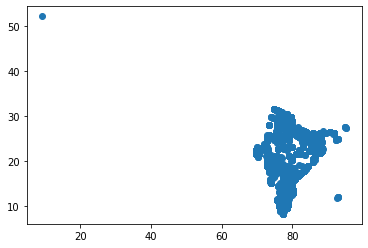

In [ ]:
import matplotlib.pyplot as plt
plt.scatter(x=df['Longitude'], y=df['Latitude'])
plt.show()

In [ ]:
pip install geopandas

     |████████████████████████████████| 1.0 MB 9.1 MB/s 
     |████████████████████████████████| 6.3 MB 51.4 MB/s 
     |████████████████████████████████| 16.7 MB 37.5 MB/s 


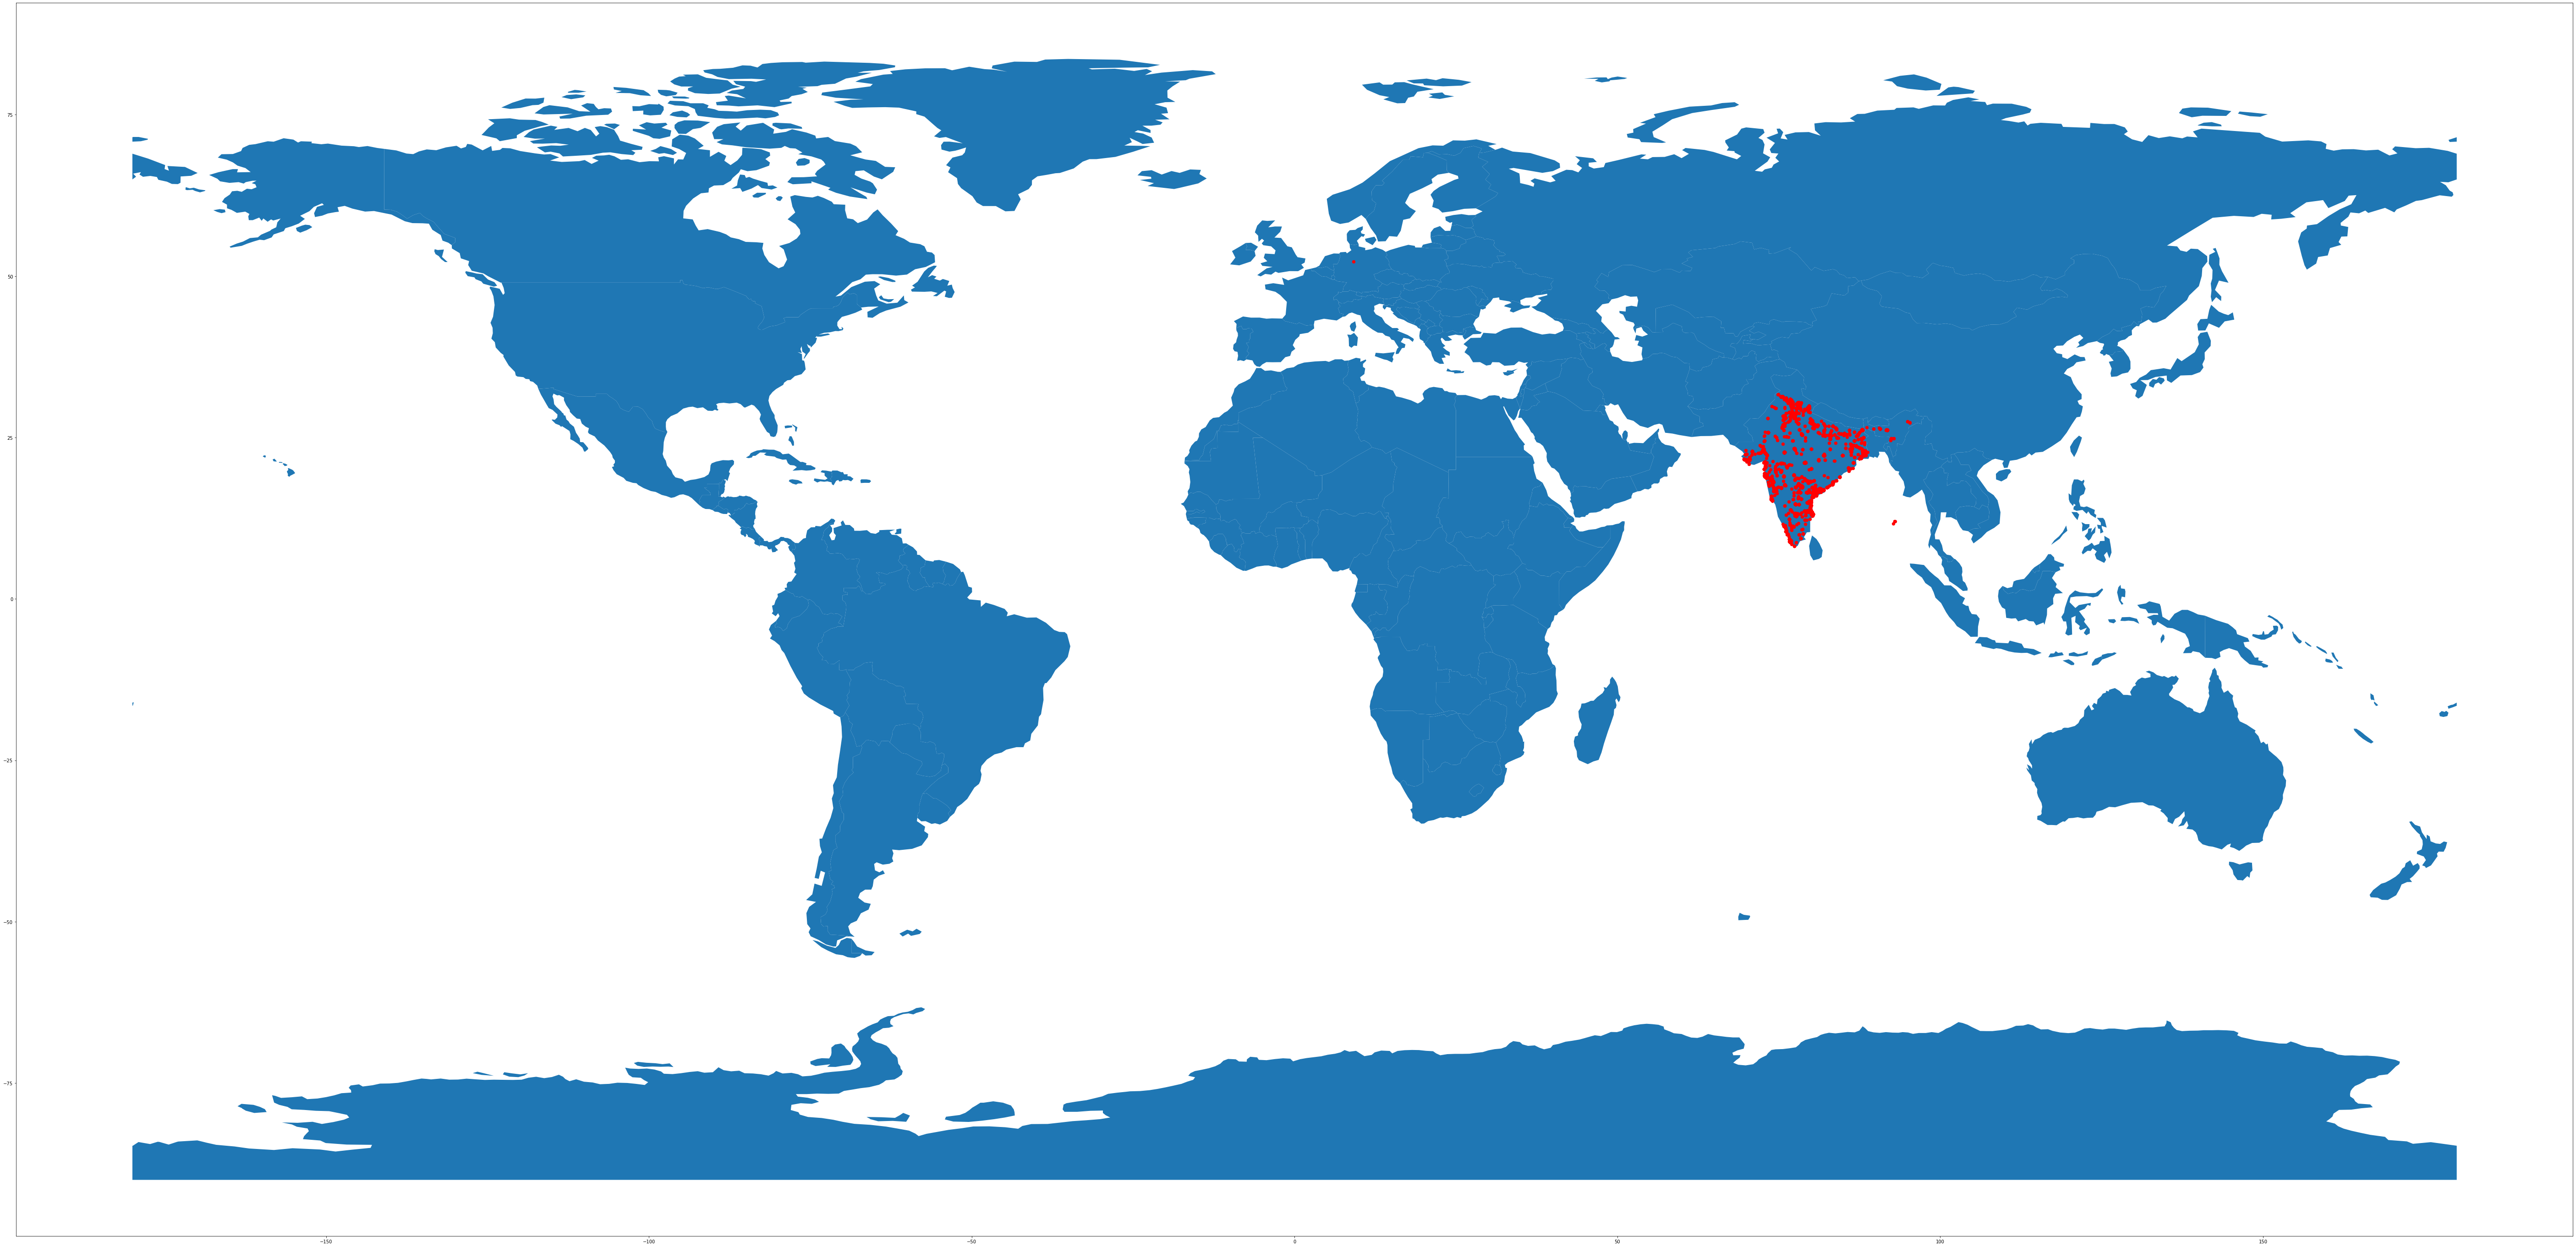

In [ ]:
import pandas as pd
from shapely.geometry import Point
import geopandas as gpd
from geopandas import GeoDataFrame

geometry = [Point(xy) for xy in zip(df['Longitude'], df['Latitude'])]
gdf = GeoDataFrame(df, geometry=geometry)   

#this is a simple map that goes with geopandas
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
gdf.plot(ax=world.plot(figsize=(100, 60)), marker='o', color='red', markersize=40);

In [ ]:
d=df.groupby(['State Name']).size()
print(d)

State Name
Andaman and Nicobar Islands       5
Andhra Pradesh                 1520
Assam                            79
Bihar                           292
Chandigarh                       57
Chhattisgarh                    187
Goa                             154
Gujarat                         995
Haryana                         549
Himachal Pradesh                 10
Jharkhand                        85
Karnataka                       700
Kerala                          179
Lower Saxony                      1
Madhya Pradesh                  236
Maharashtra                    3490
NCT                            2034
Odisha                          127
Punjab                          358
Rajasthan                       341
Tamil Nadu                      581
Telangana                      1050
Uttar Pradesh                  1760
Uttarakhand                     632
West Bengal                    1538
dtype: int64


In [ ]:
d=df.groupby(['Operator']).size()
print(d)

Operator
Airtel      4114
BSNL         607
Idea        1263
MTNL          89
Other          2
RJio        7690
Vodafone    3195
dtype: int64


In [ ]:
d=df.groupby(['Network Type']).size()
print(d)

Network Type
2G      408
3G     1914
4G    14638
dtype: int64


In [ ]:
d=df.groupby(['Operator','Call Drop Category']).size()
print(d)

Operator  Call Drop Category
Airtel    Call Dropped           518
          Poor Voice Quality    1445
          Satisfactory          2151
BSNL      Call Dropped            33
          Poor Voice Quality      70
          Satisfactory           504
Idea      Call Dropped           167
          Poor Voice Quality     319
          Satisfactory           777
MTNL      Call Dropped            10
          Poor Voice Quality       2
          Satisfactory            77
Other     Satisfactory             2
RJio      Call Dropped           674
          Poor Voice Quality    2385
          Satisfactory          4631
Vodafone  Call Dropped           214
          Poor Voice Quality    1142
          Satisfactory          1839
dtype: int64


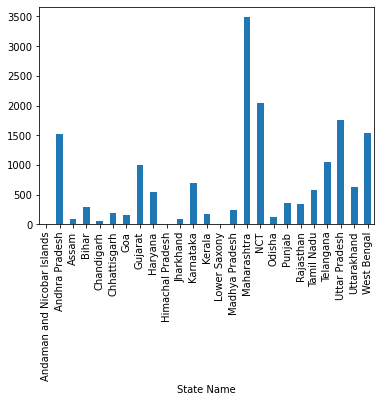

In [ ]:
df.groupby(['State Name']).size().plot(kind = "bar")

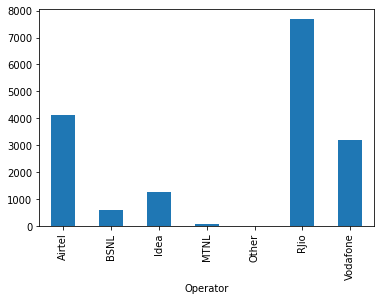

In [ ]:
df.groupby(['Operator']).size().plot(kind = "bar")

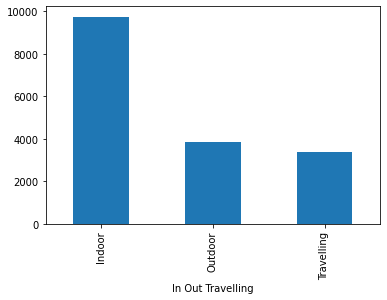

In [ ]:
df.groupby(['In Out Travelling']).size().plot(kind = "bar")

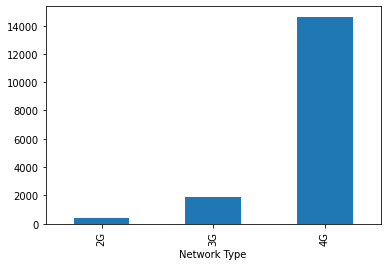

In [ ]:
df.groupby(['Network Type']).size().plot(kind = "bar")

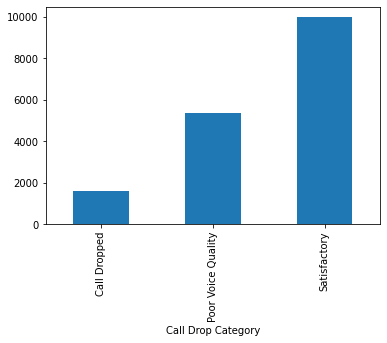

In [ ]:
	df.groupby(['Call Drop Category']).size().plot(kind = "bar")

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16960 entries, 0 to 16959
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Operator            16960 non-null  object  
 1   In Out Travelling   16960 non-null  object  
 2   Network Type        16960 non-null  object  
 3   Rating              16960 non-null  int64   
 4   Call Drop Category  16960 non-null  object  
 5   Latitude            16960 non-null  float64 
 6   Longitude           16960 non-null  float64 
 7   State Name          16960 non-null  object  
 8   geometry            16960 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(5)
memory usage: 1.2+ MB


/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


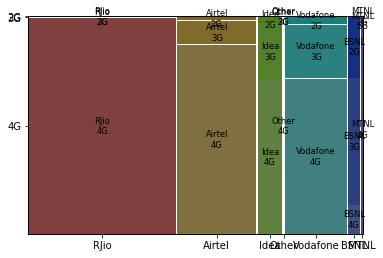

In [ ]:
from statsmodels.graphics.mosaicplot import mosaic
plt.rcParams['font.size'] = 10
mosaic(df, ['Operator', 'Network Type']);

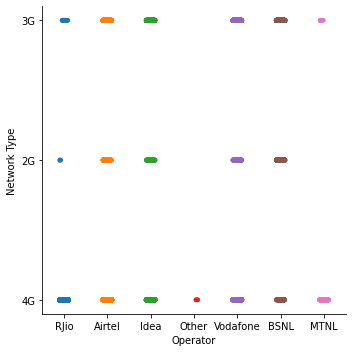

In [ ]:

# import the seaborn library
import seaborn as sns
sns.catplot(x="Operator", y="Network Type", data=df)

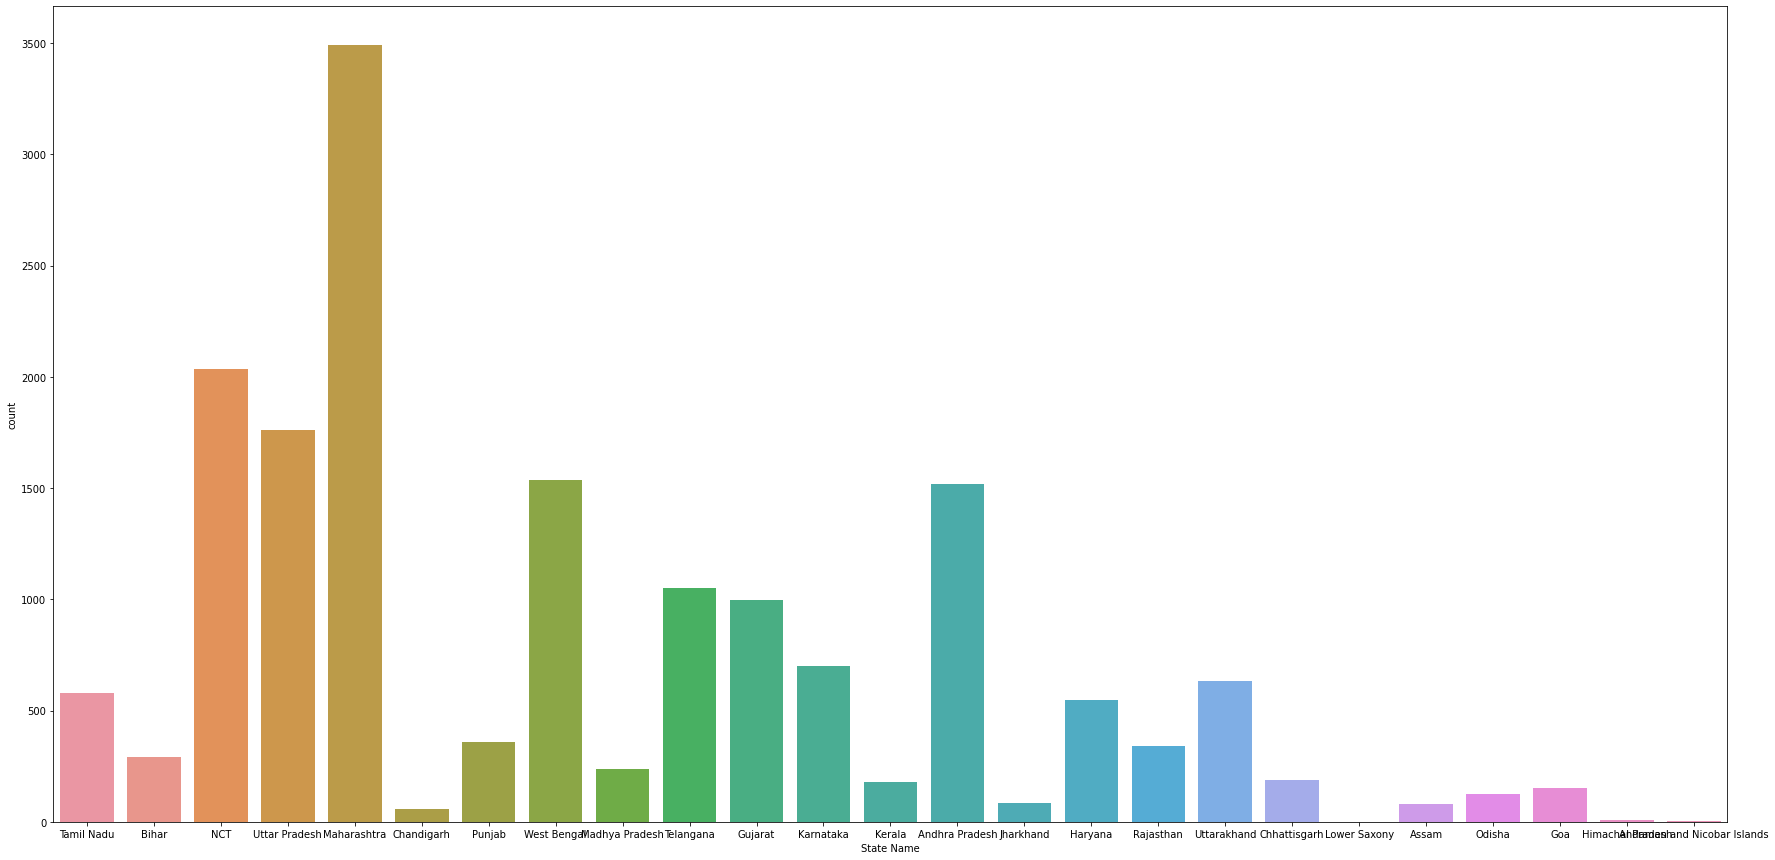

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(x ='State Name', data = df)

Text(0.5, 1.0, 'Average Ratind by Network Type, Separated by Operator')

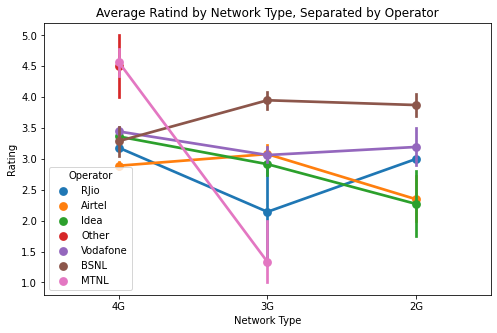

In [ ]:
plt.figure(figsize=(8,5))
sns.pointplot(x='Network Type',y='Rating',data=df, hue='Operator')
plt.title("Average Ratind by Network Type, Separated by Operator")

Text(0.5, 1.0, 'Count of Call Drop Category ')

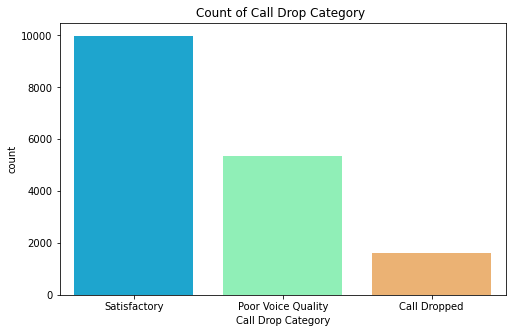

In [ ]:
plt.figure(figsize=(8,5))
sns.countplot(x='Call Drop Category',data=df, palette='rainbow')
plt.title("Count of Call Drop Category ")

Text(0.5, 1.0, 'Count of Passengers that Call Drop Category in Each State')

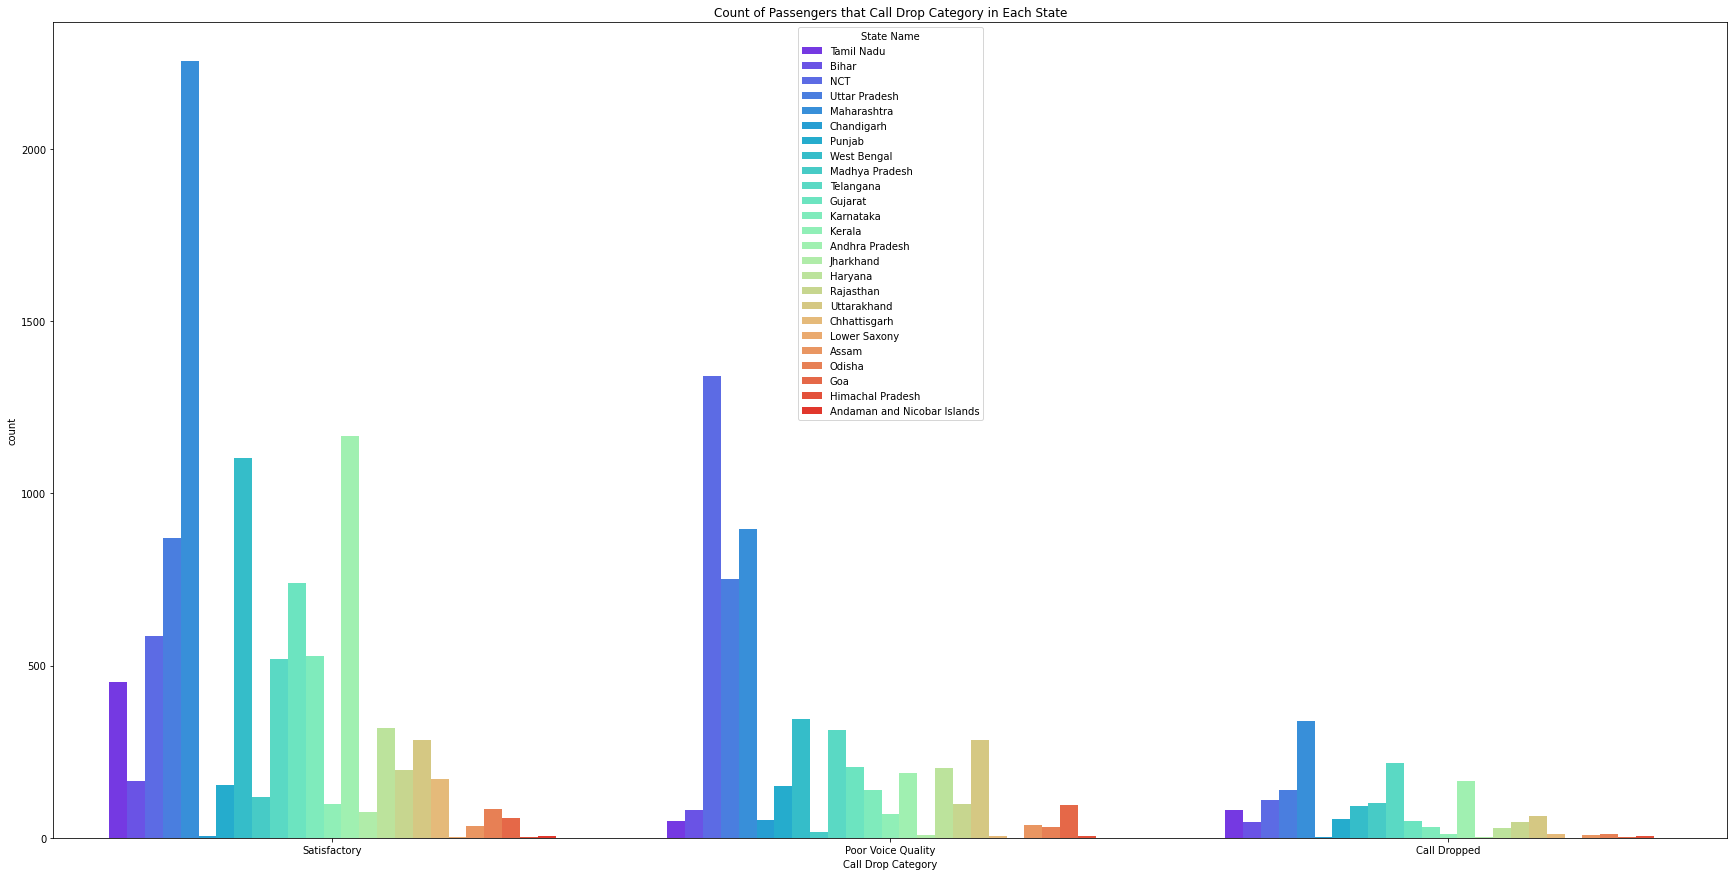

In [ ]:
plt.figure(figsize=(30,15))
sns.countplot(x='Call Drop Category',data=df, palette='rainbow',hue='State Name')
plt.title("Count of Passengers that Call Drop Category in Each State")


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16960 entries, 0 to 16959
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype   
---  ------              --------------  -----   
 0   Operator            16960 non-null  object  
 1   In Out Travelling   16960 non-null  object  
 2   Network Type        16960 non-null  object  
 3   Rating              16960 non-null  int64   
 4   Call Drop Category  16960 non-null  object  
 5   Latitude            16960 non-null  float64 
 6   Longitude           16960 non-null  float64 
 7   State Name          16960 non-null  object  
 8   geometry            16960 non-null  geometry
dtypes: float64(2), geometry(1), int64(1), object(5)
memory usage: 1.2+ MB


In [ ]:
plt.figure(figsize=(12,8))
sns.violinplot(x='Operator',y="Rating", data=df, hue='State Name', palette='rainbow')
sns.swarmplot(x='Operator',y="Rating", data=df, hue='State Name', dodge='True', color='grey', alpha=.8, s=4)
plt.title("Call Drop Category by Passenger Operator, Separated by State")